# **Predicting House Prices using Supervised Machine Learning with Scikit-Learn**

### About Dataset
There's a story behind every dataset and here's your opportunity to share yours.
Pakistan is the 5th most populous country and 33rd largest country. The real estate sector in Pakistan is one of the most expanding sector,, so it is of due importance to study the pricing of houses in different provinces, cities a and sectors of Pakistan to see what's the trend.

The data was created between May 15, 2020, 6:13 AM (UTC-07:00) to April 4, 2021, 12:41 PM (UTC-07:00).

Predictions can be achieved by different regression models!

### Acknowledgements
The data was web scraped by @huzzefakhan from Zameen.com using 'beautiful soup' python library. The dataset was originally uploaded on Open Data Pakistan (https://opendata.com.pk/dataset/property-data-for-pakistan). The author made a few changes (converting areas in marlas and kanals to cubic feet and dropping redundant columns) and reuploaded the dataset for easy usability.

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json

In [2]:
house_data = pd.read_csv('./dataset/real_estate_data.csv', index_col=0, parse_dates=['date_added'])

# Loading dataset and performing EDA, Preporcessing etc.

In [3]:
house_data.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2019-02-04,NaN,NaN,1089.004
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,2019-05-04,NaN,NaN,15246.056
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,2019-07-17,NaN,NaN,2178.008
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,2019-04-05,NaN,NaN,10890.000
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,2019-07-10,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [4]:
house_data.shape

(168446, 17)

In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168446 entries, 0 to 168445
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   property_id    168446 non-null  int64         
 1   location_id    168446 non-null  int64         
 2   page_url       168446 non-null  object        
 3   property_type  168446 non-null  object        
 4   price          168446 non-null  int64         
 5   location       168446 non-null  object        
 6   city           168446 non-null  object        
 7   province_name  168446 non-null  object        
 8   latitude       168446 non-null  float64       
 9   longitude      168446 non-null  float64       
 10  baths          168446 non-null  int64         
 11  purpose        168446 non-null  object        
 12  bedrooms       168446 non-null  int64         
 13  date_added     168446 non-null  datetime64[ns]
 14  agency         124375 non-null  object        
 15  agent

## Checking for null values and duplicates.

In [6]:
house_data.isna().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Total_Area           0
dtype: int64

In [7]:
house_data.duplicated().sum()

np.int64(0)

## Dropping redundant columns and with high null values.

In [8]:
house_data.drop(columns=['agency', 'agent', 'property_id', 'location_id', 'page_url', 'latitude', 'longitude', 'date_added'], inplace=True)

# Summary stats for continous variables.

In [9]:
house_data.describe()

,price,baths,bedrooms,Total_Area
count,1.684460e+05,168446.000000,168446.000000,1.684460e+05
mean,1.776576e+07,2.874227,3.179422,1.394239e+04
std,3.531003e+07,2.463400,1.971401,8.623647e+05
min,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.750000e+05,0.000000,2.000000,1.905757e+03
50%,8.500000e+06,3.000000,3.000000,4.356016e+03
75%,1.950000e+07,4.000000,4.000000,1.197904e+04
max,2.000000e+09,403.000000,68.000000,3.387988e+08


# Summary stats for categorical variables.

In [10]:
house_data.describe(include='object')

,property_type,location,city,province_name,purpose
count,168446,168446,168446,168446,168446
unique,7,1509,5,3,2
top,House,DHA Defence,Karachi,Punjab,For Sale
freq,105468,22046,60484,70536,120655


In [11]:
for col in house_data.describe(include='object').columns:
    print(house_data[col].unique())

['Flat' 'House' 'Penthouse' 'Farm House' 'Lower Portion' 'Upper Portion'
 'Room']
['G-10' 'E-11' 'G-15' ... 'Samanzar Colony' 'Shahra-e-Liaquat' 'Sundar']
['Islamabad' 'Lahore' 'Faisalabad' 'Rawalpindi' 'Karachi']
['Islamabad Capital' 'Punjab' 'Sindh']
['For Sale' 'For Rent']


In [12]:
house_data[house_data['province_name'] == 'Punjab']

,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area
47,House,220000000,Model Town,Lahore,Punjab,0,For Sale,0,32670.000
48,House,40000000,Multan Road,Lahore,Punjab,5,For Sale,5,5445.000
49,House,9500000,Eden,Lahore,Punjab,0,For Sale,3,2450.259
50,House,125000000,Gulberg,Lahore,Punjab,7,For Sale,8,5445.000
51,House,21000000,Allama Iqbal Town,Lahore,Punjab,5,For Sale,6,2994.761
...,...,...,...,...,...,...,...,...,...
168426,House,44000000,DHA Defence,Lahore,Punjab,7,For Sale,6,5445.000
168427,House,55000000,DHA Defence,Lahore,Punjab,6,For Sale,5,5445.000
168428,House,20500000,DHA Defence,Lahore,Punjab,4,For Sale,3,2722.510
168429,House,170000000,DHA Defence,Lahore,Punjab,5,For Sale,5,10890.000


In [13]:
house_data[house_data['city'] == 'Karachi']

,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area
156,House,450000000,Cantt,Karachi,Sindh,7,For Sale,6,21780.000
157,House,35000000,Gulistan-e-Jauhar,Karachi,Sindh,8,For Sale,6,4356.016
158,Flat,21000000,DHA Defence,Karachi,Sindh,3,For Sale,3,24230.339
159,House,6500000,Malir,Karachi,Sindh,1,For Sale,2,8712.032
160,House,13000000,Gadap Town,Karachi,Sindh,4,For Sale,4,26136.096
...,...,...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.096
168442,House,12500000,Gadap Town,Karachi,Sindh,0,For Sale,3,2178.008
168443,House,27000000,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.096
168444,House,11000000,Gadap Town,Karachi,Sindh,0,For Sale,3,21235.578


In [14]:
len(house_data.location.unique())

1509

## Subsetting the dataset for limiting to Karachi Only.

In [15]:
karachi_house_data = house_data[house_data['city'] == 'Karachi']

In [16]:
karachi_house_data.columns

Index(['property_type', 'price', 'location', 'city', 'province_name', 'baths',
       'purpose', 'bedrooms', 'Total_Area'],
      dtype='object')

In [17]:
print('Locations in Karachi: ', len(karachi_house_data.location.unique()))
karachi_house_data.location.unique()

Locations in Karachi:  203


array(['Cantt', 'Gulistan-e-Jauhar', 'DHA Defence', 'Malir', 'Gadap Town',
       'Gulshan-e-Iqbal Town', 'Scheme 33', 'Bath Island',
       'Abul Hassan Isphani Road', 'Nazimabad', 'Falcon Complex Faisal',
       'Shahra-e-Faisal', 'Gizri', 'Saddar Town', 'Federal B Area',
       'North Karachi', 'Navy Housing Scheme Karsaz', 'Jamshed Town',
       'Bahria Town Karachi', 'Jinnah Avenue', 'PAF Housing Scheme',
       'North Nazimabad', 'Clifton', 'Northern Bypass',
       'Fazaia Housing Scheme', 'New Karachi', 'Khalid Bin Walid Road',
       'Shaheed Millat Road', 'Anda Mor Road', 'Lyari Town',
       'Defence View Society', 'P & T Colony', 'Sea View Apartments',
       'Tariq Road', 'Baldia Town', 'Zamzama',
       'Gulshan-e-Usman Housing Society', 'Liaquatabad', 'Garden West',
       'Gulberg Town', 'Chapal Uptown', 'Baloch Colony', 'Manzoor Colony',
       'Aisha Manzil', 'Delhi Colony', 'Airport', 'Jamshed Road',
       'University Road', 'Shah Faisal Town', 'Civil Lines', 'Abid 

In [18]:
karachi_house_data

,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area
156,House,450000000,Cantt,Karachi,Sindh,7,For Sale,6,21780.000
157,House,35000000,Gulistan-e-Jauhar,Karachi,Sindh,8,For Sale,6,4356.016
158,Flat,21000000,DHA Defence,Karachi,Sindh,3,For Sale,3,24230.339
159,House,6500000,Malir,Karachi,Sindh,1,For Sale,2,8712.032
160,House,13000000,Gadap Town,Karachi,Sindh,4,For Sale,4,26136.096
...,...,...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.096
168442,House,12500000,Gadap Town,Karachi,Sindh,0,For Sale,3,2178.008
168443,House,27000000,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.096
168444,House,11000000,Gadap Town,Karachi,Sindh,0,For Sale,3,21235.578


## Outlier Check and Feature Engineering

In [19]:
karachi_house_data.describe()

,price,baths,bedrooms,Total_Area
count,6.048400e+04,60484.000000,60484.000000,6.048400e+04
mean,1.983883e+07,2.632283,3.045103,1.358089e+04
std,3.830393e+07,1.931710,1.781785,2.328377e+04
min,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,2.400000e+06,2.000000,2.000000,3.811514e+03
50%,8.500000e+06,3.000000,3.000000,1.143454e+04
75%,1.850000e+07,3.000000,4.000000,1.579056e+04
max,1.450000e+09,13.000000,68.000000,3.267000e+06


In [20]:
karachi_house_data

,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area
156,House,450000000,Cantt,Karachi,Sindh,7,For Sale,6,21780.000
157,House,35000000,Gulistan-e-Jauhar,Karachi,Sindh,8,For Sale,6,4356.016
158,Flat,21000000,DHA Defence,Karachi,Sindh,3,For Sale,3,24230.339
159,House,6500000,Malir,Karachi,Sindh,1,For Sale,2,8712.032
160,House,13000000,Gadap Town,Karachi,Sindh,4,For Sale,4,26136.096
...,...,...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.096
168442,House,12500000,Gadap Town,Karachi,Sindh,0,For Sale,3,2178.008
168443,House,27000000,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.096
168444,House,11000000,Gadap Town,Karachi,Sindh,0,For Sale,3,21235.578


In [21]:
karachi_house_data.reset_index(drop=True, inplace=True)

In [22]:
karachi_house_data.rename(columns={'Total_Area': 'sq_ft'}, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10676\2088414551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  karachi_house_data.rename(columns={'Total_Area': 'sq_ft'}, inplace=True)


## Converting price into lakhs.

In [23]:
karachi_house_data['price'] = round(karachi_house_data['price']/100000,2)
karachi_house_data.rename(columns={'price': 'price_in_lakh'}, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10676\354572982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  karachi_house_data['price'] = round(karachi_house_data['price']/100000,2)
C:\Users\DELL\AppData\Local\Temp\ipykernel_10676\354572982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  karachi_house_data.rename(columns={'price': 'price_in_lakh'}, inplace=True)


### Deriving a variable for square yards from square feets.

In [24]:
karachi_house_data['sq_ft'] = round(karachi_house_data['sq_ft'],2)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10676\1279084833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  karachi_house_data['sq_ft'] = round(karachi_house_data['sq_ft'],2)


In [25]:
karachi_house_data

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft
0,House,4500.0,Cantt,Karachi,Sindh,7,For Sale,6,21780.00
1,House,350.0,Gulistan-e-Jauhar,Karachi,Sindh,8,For Sale,6,4356.02
2,Flat,210.0,DHA Defence,Karachi,Sindh,3,For Sale,3,24230.34
3,House,65.0,Malir,Karachi,Sindh,1,For Sale,2,8712.03
4,House,130.0,Gadap Town,Karachi,Sindh,4,For Sale,4,26136.10
...,...,...,...,...,...,...,...,...,...
60479,House,265.0,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.10
60480,House,125.0,Gadap Town,Karachi,Sindh,0,For Sale,3,2178.01
60481,House,270.0,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.10
60482,House,110.0,Gadap Town,Karachi,Sindh,0,For Sale,3,21235.58


In [26]:
karachi_house_data['sq_yards'] = round(karachi_house_data['sq_ft']/9,2)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10676\3500174800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  karachi_house_data['sq_yards'] = round(karachi_house_data['sq_ft']/9,2)


In [27]:
karachi_house_data.head()

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
0,House,4500.0,Cantt,Karachi,Sindh,7,For Sale,6,21780.00,2420.00
1,House,350.0,Gulistan-e-Jauhar,Karachi,Sindh,8,For Sale,6,4356.02,484.00
2,Flat,210.0,DHA Defence,Karachi,Sindh,3,For Sale,3,24230.34,2692.26
3,House,65.0,Malir,Karachi,Sindh,1,For Sale,2,8712.03,968.00
4,House,130.0,Gadap Town,Karachi,Sindh,4,For Sale,4,26136.10,2904.01


<Axes: >

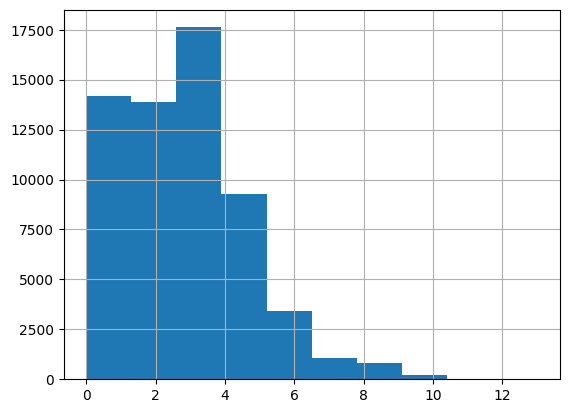

In [28]:
karachi_house_data['baths'].hist()

<Axes: >

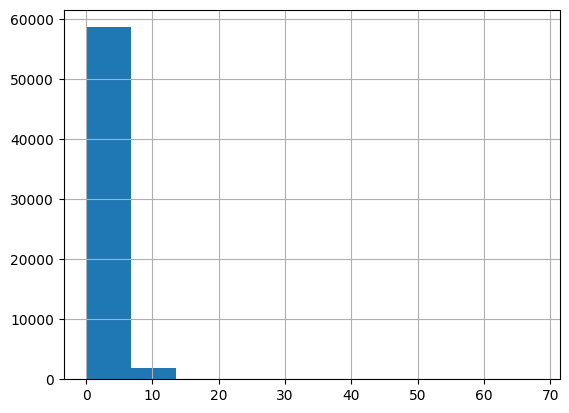

In [29]:
karachi_house_data['bedrooms'].hist()

<Axes: xlabel='bedrooms'>

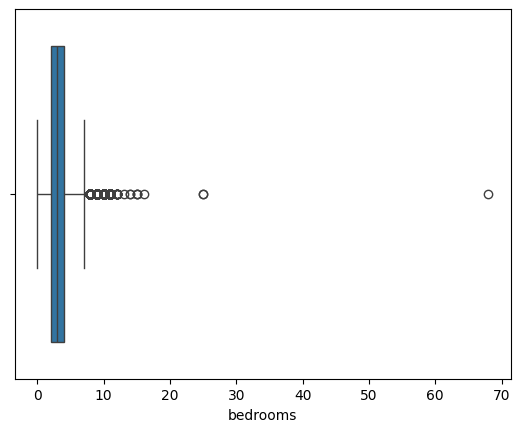

In [30]:
sns.boxplot(data=karachi_house_data, x='bedrooms')

In [31]:
karachi_house_data[karachi_house_data['baths'] == 0]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
12,Flat,295.0,Cantt,Karachi,Sindh,0,For Sale,3,31036.61,3448.51
13,Flat,300.0,Cantt,Karachi,Sindh,0,For Sale,3,31036.61,3448.51
14,Flat,375.0,Cantt,Karachi,Sindh,0,For Sale,4,35664.88,3962.76
15,Flat,450.0,Bath Island,Karachi,Sindh,0,For Sale,3,24230.34,2692.26
18,Flat,50.0,Gulshan-e-Iqbal Town,Karachi,Sindh,0,For Sale,2,14701.55,1633.51
...,...,...,...,...,...,...,...,...,...,...
60478,Flat,48.0,Gadap Town,Karachi,Sindh,0,For Sale,2,10345.54,1149.50
60479,House,265.0,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.10,2904.01
60480,House,125.0,Gadap Town,Karachi,Sindh,0,For Sale,3,2178.01,242.00
60481,House,270.0,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.10,2904.01


In [32]:
karachi_house_data['bedrooms'].value_counts()

bedrooms
3     21101
2     16064
4      7036
0      5633
6      4434
5      3461
1       842
7       744
8       562
9       232
10      183
11      172
12       10
15        3
14        2
25        2
13        1
16        1
68        1
Name: count, dtype: int64

### Checking houses with more than 16 bedrooms

In [33]:
karachi_house_data[karachi_house_data['bedrooms'] > 16]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
50937,House,25.0,North Nazimabad,Karachi,Sindh,0,For Rent,68,359370.0,39930.0
52091,House,5.5,Jamshed Town,Karachi,Sindh,0,For Rent,25,16335.0,1815.0
55055,House,9.0,Gulshan-e-Iqbal Town,Karachi,Sindh,0,For Rent,25,16335.0,1815.0


In [34]:
karachi_house_data = karachi_house_data[~(karachi_house_data['bedrooms'] > 16)]
karachi_house_data.shape

(60481, 10)

In [35]:
karachi_house_data[karachi_house_data['bedrooms'] > 16]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards


In [36]:
karachi_house_data['bedrooms'].mean()

np.float64(3.043302855442205)

In [37]:
karachi_house_data['sq_ft'].min()

np.float64(0.0)

In [38]:
karachi_house_data[karachi_house_data['sq_ft'] == 0]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
10694,House,44.0,Malir,Karachi,Sindh,2,For Sale,2,0.0,0.0


In [39]:
karachi_house_data = karachi_house_data[~(karachi_house_data['sq_ft'] == 0)]

In [40]:
karachi_house_data[(karachi_house_data['baths'] == 0) & (karachi_house_data['bedrooms'] == 0)]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
45,House,725.00,Gulshan-e-Iqbal Town,Karachi,Sindh,0,For Sale,0,65340.00,7260.00
61,Room,0.08,Gulshan-e-Iqbal Town,Karachi,Sindh,0,For Rent,0,2994.76,332.75
181,House,145.00,Scheme 33,Karachi,Sindh,0,For Sale,0,4356.02,484.00
200,House,1550.00,DHA Defence,Karachi,Sindh,0,For Sale,0,70785.00,7865.00
211,Lower Portion,0.80,Navy Housing Scheme Karsaz,Karachi,Sindh,0,For Rent,0,3811.51,423.50
...,...,...,...,...,...,...,...,...,...,...
60427,House,295.00,North Nazimabad,Karachi,Sindh,0,For Sale,0,25319.34,2813.26
60428,House,475.00,North Nazimabad,Karachi,Sindh,0,For Sale,0,47916.18,5324.02
60462,House,290.00,North Nazimabad,Karachi,Sindh,0,For Sale,0,25319.34,2813.26
60464,House,2500.00,North Nazimabad,Karachi,Sindh,0,For Sale,0,21780.00,2420.00


In [41]:
karachi_house_data = karachi_house_data[~((karachi_house_data['baths'] == 0) & (karachi_house_data['bedrooms'] == 0))]
karachi_house_data.shape

(55099, 10)

In [42]:
karachi_house_data.reset_index(drop=True, inplace=True)

In [43]:
karachi_house_data

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
0,House,4500.0,Cantt,Karachi,Sindh,7,For Sale,6,21780.00,2420.00
1,House,350.0,Gulistan-e-Jauhar,Karachi,Sindh,8,For Sale,6,4356.02,484.00
2,Flat,210.0,DHA Defence,Karachi,Sindh,3,For Sale,3,24230.34,2692.26
3,House,65.0,Malir,Karachi,Sindh,1,For Sale,2,8712.03,968.00
4,House,130.0,Gadap Town,Karachi,Sindh,4,For Sale,4,26136.10,2904.01
...,...,...,...,...,...,...,...,...,...,...
55094,House,265.0,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.10,2904.01
55095,House,125.0,Gadap Town,Karachi,Sindh,0,For Sale,3,2178.01,242.00
55096,House,270.0,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.10,2904.01
55097,House,110.0,Gadap Town,Karachi,Sindh,0,For Sale,3,21235.58,2359.51


In [44]:
karachi_house_data.describe()

,price_in_lakh,baths,bedrooms,sq_ft,sq_yards
count,55099.000000,55099.000000,55099.000000,55099.000000,55099.000000
mean,197.170152,2.889508,3.340532,13319.100544,1479.899857
std,382.234890,1.831109,1.548575,17475.379672,1941.709158
min,0.000000,0.000000,0.000000,272.250000,30.250000
25%,22.000000,2.000000,2.000000,3267.010000,363.000000
50%,85.000000,3.000000,3.000000,11434.540000,1270.500000
75%,180.000000,4.000000,4.000000,15790.560000,1754.510000
max,14500.000000,13.000000,16.000000,952875.000000,105875.000000


In [45]:
karachi_house_data[karachi_house_data['sq_yards'] > 5000]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
40,House,915.00,DHA Defence,Karachi,Sindh,6,For Sale,5,65340.0,7260.0
47,House,1200.00,Gulshan-e-Iqbal Town,Karachi,Sindh,6,For Sale,6,65340.0,7260.0
51,House,2.00,DHA Defence,Karachi,Sindh,0,For Rent,6,65340.0,7260.0
72,House,950.00,Cantt,Karachi,Sindh,6,For Sale,7,59895.0,6655.0
79,House,850.00,Cantt,Karachi,Sindh,6,For Sale,6,59895.0,6655.0
...,...,...,...,...,...,...,...,...,...,...
55023,Flat,0.38,Bahria Town Karachi,Karachi,Sindh,3,For Rent,3,185130.0,20570.0
55066,Flat,300.00,Shaheed Millat Road,Karachi,Sindh,3,For Sale,3,174240.0,19360.0
55068,House,1400.00,Gulshan-e-Iqbal Town,Karachi,Sindh,7,For Sale,6,59895.0,6655.0
55072,Flat,325.00,Khalid Bin Walid Road,Karachi,Sindh,4,For Sale,4,294030.0,32670.0


In [46]:
karachi_house_data[(karachi_house_data['sq_ft']/(karachi_house_data['bedrooms'] + karachi_house_data['baths']) < 70) & (karachi_house_data['sq_yards'] > 61)]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
460,House,65.0,North Karachi,Karachi,Sindh,5,For Sale,8,816.75,90.75
4538,House,150.0,Liaquatabad,Karachi,Sindh,8,For Sale,11,1089.00,121.00
5105,House,140.0,North Nazimabad,Karachi,Sindh,7,For Sale,10,1089.00,121.00
6256,House,90.0,North Karachi,Karachi,Sindh,7,For Sale,11,1089.00,121.00
8154,House,65.0,Super Highway,Karachi,Sindh,6,For Sale,6,816.75,90.75
11819,House,120.0,Mehmoodabad,Karachi,Sindh,5,For Sale,11,816.75,90.75
14016,Flat,170.0,Dalmia Cement Factory Road,Karachi,Sindh,6,For Sale,10,1089.00,121.00
19959,House,75.0,New Karachi,Karachi,Sindh,6,For Sale,6,816.75,90.75
21559,House,185.0,Mehmoodabad,Karachi,Sindh,10,For Sale,11,1089.00,121.00
23452,House,75.0,Landhi,Karachi,Sindh,10,For Sale,10,1089.00,121.00


In [47]:
karachi_house_data[(karachi_house_data['sq_yards'] < 90) & (karachi_house_data['bedrooms'] > 5) ]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
16872,House,59.5,Liaquatabad,Karachi,Sindh,3,For Sale,6,544.5,60.5
19345,House,55.0,Malir,Karachi,Sindh,4,For Sale,6,544.5,60.5


In [48]:
karachi_house_data[~(karachi_house_data['sq_ft']/(karachi_house_data['bedrooms'] + karachi_house_data['baths']) < 70)]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
0,House,4500.0,Cantt,Karachi,Sindh,7,For Sale,6,21780.00,2420.00
1,House,350.0,Gulistan-e-Jauhar,Karachi,Sindh,8,For Sale,6,4356.02,484.00
2,Flat,210.0,DHA Defence,Karachi,Sindh,3,For Sale,3,24230.34,2692.26
3,House,65.0,Malir,Karachi,Sindh,1,For Sale,2,8712.03,968.00
4,House,130.0,Gadap Town,Karachi,Sindh,4,For Sale,4,26136.10,2904.01
...,...,...,...,...,...,...,...,...,...,...
55094,House,265.0,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.10,2904.01
55095,House,125.0,Gadap Town,Karachi,Sindh,0,For Sale,3,2178.01,242.00
55096,House,270.0,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.10,2904.01
55097,House,110.0,Gadap Town,Karachi,Sindh,0,For Sale,3,21235.58,2359.51


In [49]:
karachi_house_data = karachi_house_data[~(karachi_house_data['sq_ft']/(karachi_house_data['bedrooms'] + karachi_house_data['baths']) < 70)]

In [50]:
karachi_house_data

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
0,House,4500.0,Cantt,Karachi,Sindh,7,For Sale,6,21780.00,2420.00
1,House,350.0,Gulistan-e-Jauhar,Karachi,Sindh,8,For Sale,6,4356.02,484.00
2,Flat,210.0,DHA Defence,Karachi,Sindh,3,For Sale,3,24230.34,2692.26
3,House,65.0,Malir,Karachi,Sindh,1,For Sale,2,8712.03,968.00
4,House,130.0,Gadap Town,Karachi,Sindh,4,For Sale,4,26136.10,2904.01
...,...,...,...,...,...,...,...,...,...,...
55094,House,265.0,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.10,2904.01
55095,House,125.0,Gadap Town,Karachi,Sindh,0,For Sale,3,2178.01,242.00
55096,House,270.0,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.10,2904.01
55097,House,110.0,Gadap Town,Karachi,Sindh,0,For Sale,3,21235.58,2359.51


In [51]:
karachi_house_data[(karachi_house_data['bedrooms'] == 0)]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
70,Flat,60.00,Bahria Town Karachi,Karachi,Sindh,2,For Sale,0,11434.54,1270.50
132,Flat,50.49,Scheme 33,Karachi,Sindh,2,For Sale,0,1089.00,121.00
696,House,80.00,North Karachi,Karachi,Sindh,4,For Sale,0,8712.03,968.00
706,Flat,35.00,North Karachi,Karachi,Sindh,2,For Sale,0,10345.54,1149.50
893,House,130.00,Scheme 33,Karachi,Sindh,5,For Sale,0,1089.00,121.00
...,...,...,...,...,...,...,...,...,...,...
50400,Flat,35.00,North Karachi,Karachi,Sindh,2,For Sale,0,8439.78,937.75
53625,Flat,35.00,Nazimabad,Karachi,Sindh,1,For Sale,0,7350.78,816.75
54143,House,335.00,Gulshan-e-Iqbal Town,Karachi,Sindh,9,For Sale,0,26680.60,2964.51
54605,Flat,38.00,Saddar Town,Karachi,Sindh,1,For Sale,0,1361.26,151.25


In [52]:
karachi_house_data = karachi_house_data[~(karachi_house_data['bedrooms'] == 0)]

In [53]:
karachi_house_data[karachi_house_data['baths'] == 0]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
12,Flat,295.0,Cantt,Karachi,Sindh,0,For Sale,3,31036.61,3448.51
13,Flat,300.0,Cantt,Karachi,Sindh,0,For Sale,3,31036.61,3448.51
14,Flat,375.0,Cantt,Karachi,Sindh,0,For Sale,4,35664.88,3962.76
15,Flat,450.0,Bath Island,Karachi,Sindh,0,For Sale,3,24230.34,2692.26
18,Flat,50.0,Gulshan-e-Iqbal Town,Karachi,Sindh,0,For Sale,2,14701.55,1633.51
...,...,...,...,...,...,...,...,...,...,...
55093,Flat,48.0,Gadap Town,Karachi,Sindh,0,For Sale,2,10345.54,1149.50
55094,House,265.0,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.10,2904.01
55095,House,125.0,Gadap Town,Karachi,Sindh,0,For Sale,3,2178.01,242.00
55096,House,270.0,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.10,2904.01


In [54]:
karachi_house_data[karachi_house_data['baths'] > karachi_house_data['bedrooms']]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
0,House,4500.0,Cantt,Karachi,Sindh,7,For Sale,6,21780.00,2420.00
1,House,350.0,Gulistan-e-Jauhar,Karachi,Sindh,8,For Sale,6,4356.02,484.00
9,House,128.0,Scheme 33,Karachi,Sindh,6,For Sale,5,26136.10,2904.01
11,Flat,340.0,Cantt,Karachi,Sindh,4,For Sale,3,31036.61,3448.51
16,House,170.0,Gulshan-e-Iqbal Town,Karachi,Sindh,5,For Sale,4,13068.05,1452.01
...,...,...,...,...,...,...,...,...,...,...
55084,House,140.0,Bahria Town Karachi,Karachi,Sindh,4,For Sale,3,1633.51,181.50
55085,House,95.0,Bahria Town Karachi,Karachi,Sindh,4,For Sale,3,16607.31,1845.26
55086,House,140.0,Bahria Town Karachi,Karachi,Sindh,5,For Sale,4,3811.51,423.50
55089,House,88.0,Bahria Town Karachi,Karachi,Sindh,4,For Sale,3,2178.01,242.00


In [55]:
karachi_house_data[(karachi_house_data['baths'] > karachi_house_data['bedrooms']+2)]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
458,House,115.0,Scheme 33,Karachi,Sindh,7,For Sale,4,13068.05,1452.01
605,House,950.0,Gulshan-e-Iqbal Town,Karachi,Sindh,9,For Sale,6,98010.00,10890.00
614,House,3.0,Jamshed Town,Karachi,Sindh,8,For Rent,5,4356.02,484.00
918,House,160.0,Korangi,Karachi,Sindh,7,For Sale,4,13068.05,1452.01
1117,House,950.0,Cantt,Karachi,Sindh,10,For Sale,6,59895.00,6655.00
...,...,...,...,...,...,...,...,...,...,...
51953,House,100.0,PTV Society,Karachi,Sindh,8,For Sale,5,1361.26,151.25
53285,House,275.0,Scheme 33,Karachi,Sindh,9,For Sale,5,26136.10,2904.01
53556,House,160.0,Gadap Town,Karachi,Sindh,7,For Sale,4,15518.31,1724.26
53663,Flat,5.4,Gadap Town,Karachi,Sindh,6,For Sale,2,7623.03,847.00


In [56]:
karachi_house_data = karachi_house_data[~(karachi_house_data['baths'] > karachi_house_data['bedrooms']+2)]

In [57]:
karachi_house_data[karachi_house_data['baths'] > karachi_house_data['bedrooms']]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
0,House,4500.0,Cantt,Karachi,Sindh,7,For Sale,6,21780.00,2420.00
1,House,350.0,Gulistan-e-Jauhar,Karachi,Sindh,8,For Sale,6,4356.02,484.00
9,House,128.0,Scheme 33,Karachi,Sindh,6,For Sale,5,26136.10,2904.01
11,Flat,340.0,Cantt,Karachi,Sindh,4,For Sale,3,31036.61,3448.51
16,House,170.0,Gulshan-e-Iqbal Town,Karachi,Sindh,5,For Sale,4,13068.05,1452.01
...,...,...,...,...,...,...,...,...,...,...
55084,House,140.0,Bahria Town Karachi,Karachi,Sindh,4,For Sale,3,1633.51,181.50
55085,House,95.0,Bahria Town Karachi,Karachi,Sindh,4,For Sale,3,16607.31,1845.26
55086,House,140.0,Bahria Town Karachi,Karachi,Sindh,5,For Sale,4,3811.51,423.50
55089,House,88.0,Bahria Town Karachi,Karachi,Sindh,4,For Sale,3,2178.01,242.00


### Imputing values for houses with 0 bathsrooms, by assuming 2:1 ratio of bedrooms and bathrooms

In [58]:
import numpy as np

In [59]:
karachi_house_data['baths'] = karachi_house_data.apply(lambda x: round(x['bedrooms']/2) if x['baths'] == 0 else x['baths'], axis=1)

In [60]:
karachi_house_data[karachi_house_data['baths'] == 0]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
327,Flat,18.00,Gulberg Town,Karachi,Sindh,0,For Sale,1,3267.01,363.00
610,Flat,12.25,Korangi,Karachi,Sindh,0,For Sale,1,4356.02,484.00
786,Flat,15.00,North Karachi,Karachi,Sindh,0,For Sale,1,4356.02,484.00
891,Room,13.00,Lyari Expressway,Karachi,Sindh,0,For Sale,1,8712.03,968.00
1071,Upper Portion,0.15,New Karachi,Karachi,Sindh,0,For Rent,1,8712.03,968.00
...,...,...,...,...,...,...,...,...,...,...
50920,Flat,26.00,Gulistan-e-Jauhar,Karachi,Sindh,0,For Sale,1,544.50,60.50
53581,House,50.00,Scheme 33,Karachi,Sindh,0,For Sale,1,1361.26,151.25
54677,Flat,25.00,Gulistan-e-Jauhar,Karachi,Sindh,0,For Sale,1,544.50,60.50
54775,Lower Portion,0.16,Scheme 33,Karachi,Sindh,0,For Rent,1,8712.03,968.00


In [61]:
karachi_house_data[karachi_house_data['bedrooms'] == 1]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
50,Flat,250.00,DHA Defence,Karachi,Sindh,1,For Sale,1,1633.51,181.50
59,Room,0.08,Gulshan-e-Iqbal Town,Karachi,Sindh,1,For Rent,1,26136.10,2904.01
63,Flat,305.00,DHA Defence,Karachi,Sindh,1,For Sale,1,14973.80,1663.76
202,Flat,26.00,Gulistan-e-Jauhar,Karachi,Sindh,1,For Sale,1,5989.52,665.50
247,Flat,22.00,Malir,Karachi,Sindh,1,For Sale,1,4900.52,544.50
...,...,...,...,...,...,...,...,...,...,...
54958,Lower Portion,0.16,Gulistan-e-Jauhar,Karachi,Sindh,1,For Rent,1,6534.02,726.00
55001,Upper Portion,0.22,DHA Defence,Karachi,Sindh,1,For Rent,1,1089.00,121.00
55005,Flat,14.80,Bahria Town Karachi,Karachi,Sindh,1,For Sale,1,7350.78,816.75
55012,Flat,14.60,Bahria Town Karachi,Karachi,Sindh,1,For Sale,1,65340.00,7260.00


In [62]:
karachi_house_data = karachi_house_data[karachi_house_data['bedrooms'] != 1]

In [63]:
karachi_house_data[karachi_house_data['baths'] == 0]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards


In [64]:
karachi_house_data[(karachi_house_data['baths'] < karachi_house_data['bedrooms']-5)]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
608,House,250.00,Malir,Karachi,Sindh,5,For Sale,11,30492.11,3388.01
2669,House,3500.00,DHA Defence,Karachi,Sindh,8,For Sale,15,21780.00,2420.00
2963,House,1.60,Gulshan-e-Iqbal Town,Karachi,Sindh,5,For Rent,11,4356.02,484.00
2992,House,120.00,North Nazimabad,Karachi,Sindh,3,For Sale,9,14157.05,1573.01
3612,House,480.00,Gulistan-e-Jauhar,Karachi,Sindh,6,For Sale,12,26136.10,2904.01
8264,House,150.00,Federal B Area,Karachi,Sindh,3,For Sale,9,13068.05,1452.01
8303,House,510.00,North Nazimabad,Karachi,Sindh,1,For Sale,9,25319.34,2813.26
8336,House,60.00,Liaquatabad,Karachi,Sindh,3,For Sale,9,8712.03,968.00
8693,House,3.50,North Nazimabad,Karachi,Sindh,4,For Rent,11,5445.00,605.00
10846,House,150.00,Mehmoodabad,Karachi,Sindh,5,For Sale,11,1633.51,181.50


In [65]:
karachi_house_data = karachi_house_data[~(karachi_house_data['baths'] < karachi_house_data['bedrooms']-5)]

In [66]:
karachi_house_data

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
0,House,4500.0,Cantt,Karachi,Sindh,7,For Sale,6,21780.00,2420.00
1,House,350.0,Gulistan-e-Jauhar,Karachi,Sindh,8,For Sale,6,4356.02,484.00
2,Flat,210.0,DHA Defence,Karachi,Sindh,3,For Sale,3,24230.34,2692.26
3,House,65.0,Malir,Karachi,Sindh,1,For Sale,2,8712.03,968.00
4,House,130.0,Gadap Town,Karachi,Sindh,4,For Sale,4,26136.10,2904.01
...,...,...,...,...,...,...,...,...,...,...
55094,House,265.0,Gadap Town,Karachi,Sindh,3,For Sale,6,26136.10,2904.01
55095,House,125.0,Gadap Town,Karachi,Sindh,2,For Sale,3,2178.01,242.00
55096,House,270.0,Gadap Town,Karachi,Sindh,3,For Sale,6,26136.10,2904.01
55097,House,110.0,Gadap Town,Karachi,Sindh,2,For Sale,3,21235.58,2359.51


In [67]:
karachi_house_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53818 entries, 0 to 55098
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  53818 non-null  object 
 1   price_in_lakh  53818 non-null  float64
 2   location       53818 non-null  object 
 3   city           53818 non-null  object 
 4   province_name  53818 non-null  object 
 5   baths          53818 non-null  int64  
 6   purpose        53818 non-null  object 
 7   bedrooms       53818 non-null  int64  
 8   sq_ft          53818 non-null  float64
 9   sq_yards       53818 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 4.5+ MB


In [68]:
karachi_house_data.drop(columns=['city', 'province_name'], inplace=True)

In [69]:
karachi_house_data.columns

Index(['property_type', 'price_in_lakh', 'location', 'baths', 'purpose',
       'bedrooms', 'sq_ft', 'sq_yards'],
      dtype='object')

In [70]:
karachi_house_data

,property_type,price_in_lakh,location,baths,purpose,bedrooms,sq_ft,sq_yards
0,House,4500.0,Cantt,7,For Sale,6,21780.00,2420.00
1,House,350.0,Gulistan-e-Jauhar,8,For Sale,6,4356.02,484.00
2,Flat,210.0,DHA Defence,3,For Sale,3,24230.34,2692.26
3,House,65.0,Malir,1,For Sale,2,8712.03,968.00
4,House,130.0,Gadap Town,4,For Sale,4,26136.10,2904.01
...,...,...,...,...,...,...,...,...
55094,House,265.0,Gadap Town,3,For Sale,6,26136.10,2904.01
55095,House,125.0,Gadap Town,2,For Sale,3,2178.01,242.00
55096,House,270.0,Gadap Town,3,For Sale,6,26136.10,2904.01
55097,House,110.0,Gadap Town,2,For Sale,3,21235.58,2359.51


In [71]:
karachi_house_data.property_type.unique()

array(['House', 'Flat', 'Lower Portion', 'Upper Portion', 'Penthouse',
       'Room', 'Farm House'], dtype=object)

In [72]:
karachi_house_data[karachi_house_data['property_type'] == 'Room']

,property_type,price_in_lakh,location,baths,purpose,bedrooms,sq_ft,sq_yards
149,Room,0.50,DHA Defence,3,For Rent,3,5445.02,605.00
1378,Room,0.50,Tariq Road,2,For Rent,5,11434.54,1270.50
1487,Room,0.35,DHA Defence,2,For Rent,3,1089.00,121.00
1785,Room,0.18,Defence View Society,2,For Rent,2,1361.26,151.25
1865,Room,0.18,Defence View Society,1,For Rent,2,1361.26,151.25
1866,Room,0.18,Defence View Society,1,For Rent,2,1361.26,151.25
2439,Room,0.13,Azam Town,2,For Rent,2,816.75,90.75
3553,Room,0.16,Dastgir Colony,1,For Rent,2,7078.53,786.50
4634,Room,0.15,North Karachi,1,For Rent,2,13068.05,1452.01
6963,Room,140.00,Gadap Town,3,For Sale,3,17424.06,1936.01


In [73]:
karachi_house_data = karachi_house_data[karachi_house_data['property_type'] != 'Room']

In [74]:
karachi_house_data['sq_yards'].min()

np.float64(30.25)

### Analysing houses of different square yards.

In [75]:
karachi_house_data[(karachi_house_data['sq_yards'] < 80)]

,property_type,price_in_lakh,location,baths,purpose,bedrooms,sq_ft,sq_yards
400,Flat,21.00,Gulshan-e-Iqbal Town,1,For Sale,2,544.5,60.5
747,Flat,22.00,North Karachi,1,For Sale,2,544.5,60.5
1454,Flat,55.00,DHA Defence,2,For Sale,2,544.5,60.5
1611,Lower Portion,1.40,Clifton,2,For Rent,3,544.5,60.5
1926,Flat,65.00,DHA Defence,2,For Sale,2,544.5,60.5
...,...,...,...,...,...,...,...,...
53887,Flat,54.00,DHA Defence,2,For Sale,2,544.5,60.5
54090,House,35.00,Malir,2,For Sale,3,544.5,60.5
54163,Flat,0.25,DHA Defence,2,For Rent,2,544.5,60.5
54191,House,95.00,Manzoor Colony,2,For Sale,2,544.5,60.5


In [76]:
karachi_house_data[(karachi_house_data['sq_yards'] >80) & (karachi_house_data['sq_yards'] < 122)]

,property_type,price_in_lakh,location,baths,purpose,bedrooms,sq_ft,sq_yards
5,House,320.00,DHA Defence,4,For Sale,4,1089.00,121.00
122,House,85.00,Malir,5,For Sale,4,1089.00,121.00
148,Flat,0.10,Federal B Area,2,For Rent,2,816.75,90.75
166,House,435.00,DHA Defence,5,For Sale,4,1089.00,121.00
199,Flat,37.00,Gulistan-e-Jauhar,2,For Sale,2,1089.00,121.00
...,...,...,...,...,...,...,...,...
54934,Flat,85.00,Gulshan-e-Iqbal Town,2,For Sale,2,1089.00,121.00
54941,Flat,75.00,Gulistan-e-Jauhar,2,For Sale,2,1089.00,121.00
54965,Flat,0.35,North Nazimabad,2,For Rent,2,1089.00,121.00
55013,House,400.00,DHA Defence,4,For Sale,4,1089.00,121.00


In [77]:
karachi_house_data[(karachi_house_data['sq_yards'] >120) & (karachi_house_data['sq_yards'] < 1000)]

,property_type,price_in_lakh,location,baths,purpose,bedrooms,sq_ft,sq_yards
1,House,350.0,Gulistan-e-Jauhar,8,For Sale,6,4356.02,484.00
3,House,65.0,Malir,1,For Sale,2,8712.03,968.00
5,House,320.0,DHA Defence,4,For Sale,4,1089.00,121.00
6,House,40.0,Malir,3,For Sale,7,8712.03,968.00
8,House,1100.0,DHA Defence,6,For Sale,6,5445.00,605.00
...,...,...,...,...,...,...,...,...
55089,House,88.0,Bahria Town Karachi,4,For Sale,3,2178.01,242.00
55090,House,50.0,Bahria Town Karachi,4,For Sale,3,1361.26,151.25
55091,House,140.0,Bahria Town Karachi,3,For Sale,3,2178.01,242.00
55092,House,140.0,Bahria Town Karachi,4,For Sale,4,3811.51,423.50


In [78]:
karachi_house_data[karachi_house_data['sq_ft']/(karachi_house_data['bedrooms'] + karachi_house_data['baths']) > 5000]

,property_type,price_in_lakh,location,baths,purpose,bedrooms,sq_ft,sq_yards
12,Flat,295.00,Cantt,2,For Sale,3,31036.61,3448.51
13,Flat,300.00,Cantt,2,For Sale,3,31036.61,3448.51
14,Flat,375.00,Cantt,2,For Sale,4,35664.88,3962.76
21,Flat,280.00,Cantt,3,For Sale,3,31036.61,3448.51
22,Flat,325.00,Cantt,3,For Sale,3,31036.61,3448.51
...,...,...,...,...,...,...,...,...
55023,Flat,0.38,Bahria Town Karachi,3,For Rent,3,185130.00,20570.00
55039,Flat,100.00,Jamshed Road,1,For Sale,2,15246.06,1694.01
55066,Flat,300.00,Shaheed Millat Road,3,For Sale,3,174240.00,19360.00
55072,Flat,325.00,Khalid Bin Walid Road,4,For Sale,4,294030.00,32670.00


In [79]:
karachi_house_data = karachi_house_data[~(karachi_house_data['sq_ft']/(karachi_house_data['bedrooms'] + karachi_house_data['baths']) > 5000)]

In [80]:
karachi_house_data

,property_type,price_in_lakh,location,baths,purpose,bedrooms,sq_ft,sq_yards
0,House,4500.0,Cantt,7,For Sale,6,21780.00,2420.00
1,House,350.0,Gulistan-e-Jauhar,8,For Sale,6,4356.02,484.00
2,Flat,210.0,DHA Defence,3,For Sale,3,24230.34,2692.26
3,House,65.0,Malir,1,For Sale,2,8712.03,968.00
4,House,130.0,Gadap Town,4,For Sale,4,26136.10,2904.01
...,...,...,...,...,...,...,...,...
55094,House,265.0,Gadap Town,3,For Sale,6,26136.10,2904.01
55095,House,125.0,Gadap Town,2,For Sale,3,2178.01,242.00
55096,House,270.0,Gadap Town,3,For Sale,6,26136.10,2904.01
55097,House,110.0,Gadap Town,2,For Sale,3,21235.58,2359.51


In [81]:
karachi_house_data.reset_index(drop=True, inplace=True)

In [82]:
karachi_house_data.head()

,property_type,price_in_lakh,location,baths,purpose,bedrooms,sq_ft,sq_yards
0,House,4500.0,Cantt,7,For Sale,6,21780.00,2420.00
1,House,350.0,Gulistan-e-Jauhar,8,For Sale,6,4356.02,484.00
2,Flat,210.0,DHA Defence,3,For Sale,3,24230.34,2692.26
3,House,65.0,Malir,1,For Sale,2,8712.03,968.00
4,House,130.0,Gadap Town,4,For Sale,4,26136.10,2904.01


In [83]:
karachi_house_data['property_type'].value_counts()

property_type
Flat             23425
House            21180
Upper Portion     4069
Lower Portion     2133
Penthouse          204
Farm House          14
Name: count, dtype: int64

In [84]:
karachi_house_data = karachi_house_data[~karachi_house_data['property_type'].isin(['Penthouse', 'Farm House'])]

In [85]:
karachi_house_data['property_type'].value_counts()

property_type
Flat             23425
House            21180
Upper Portion     4069
Lower Portion     2133
Name: count, dtype: int64

Now the dataset is cleaned and ready.

## More Feature Engineering

### Encoding Categorical Features:

In [86]:
karachi_house_data['location'].value_counts()

location
DHA Defence             9223
Bahria Town Karachi     8157
Gulistan-e-Jauhar       5175
Gulshan-e-Iqbal Town    3912
Scheme 33               2533
                        ... 
Goth Ibrahim Haidri        1
Erum Villas                1
Humaira Town               1
Damba                      1
Shahra-e-Liaquat           1
Name: count, Length: 197, dtype: int64

In [87]:
len(karachi_house_data['location'].unique())

197

Applying One Hot Encoding on location variable.

In [88]:
location_dummy_df = pd.get_dummies(karachi_house_data['location'], dtype='int')
location_dummy_df = location_dummy_df.drop('Teacher Society', axis=1)
location_dummy_df

,APP Employees Co-operative Housing Society,ASF Housing Scheme,ASF Tower,Abdullah Ahmed Road,Abdullah Haroon Road,Abid Town,Abul Hassan Isphani Road,Airport,Aisha Manzil,Al-Hilal Society,...,Suparco Road,Super Highway,Surti Muslim Co-Operative Housing Society,Tariq Road,Teachers Society,Times Residency,Tipu Sultan Road,University Road,Zamzama,circular road
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
karachi_house_data['property_type'].unique()

array(['House', 'Flat', 'Lower Portion', 'Upper Portion'], dtype=object)

In [90]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

encoder.fit_transform(karachi_house_data[['property_type']])

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [91]:
karachi_house_data['property_type'].replace({'House': 1, 'Flat': 2, 'Lower Portion': 3, 'Upper Portion': 4}, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10676\2271391627.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  karachi_house_data['property_type'].replace({'House': 1, 'Flat': 2, 'Lower Portion': 3, 'Upper Portion': 4}, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_10676\2271391627.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_o

In [92]:
karachi_house_data['property_type'].value_counts()

property_type
2    23425
1    21180
4     4069
3     2133
Name: count, dtype: int64

In [93]:
karachi_house_data['purpose'].value_counts()

purpose
For Sale    39553
For Rent    11254
Name: count, dtype: int64

In [94]:
karachi_house_data['purpose'].replace({'For Rent': 1, 'For Sale': 2}, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10676\1243255057.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  karachi_house_data['purpose'].replace({'For Rent': 1, 'For Sale': 2}, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_10676\1243255057.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', T

In [95]:
karachi_house_data.drop(columns=['location'], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10676\1134307611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  karachi_house_data.drop(columns=['location'], inplace=True)


In [96]:
karachi_house_data

,property_type,price_in_lakh,baths,purpose,bedrooms,sq_ft,sq_yards
0,1,4500.0,7,2,6,21780.00,2420.00
1,1,350.0,8,2,6,4356.02,484.00
2,2,210.0,3,2,3,24230.34,2692.26
3,1,65.0,1,2,2,8712.03,968.00
4,1,130.0,4,2,4,26136.10,2904.01
...,...,...,...,...,...,...,...
51020,1,265.0,3,2,6,26136.10,2904.01
51021,1,125.0,2,2,3,2178.01,242.00
51022,1,270.0,3,2,6,26136.10,2904.01
51023,1,110.0,2,2,3,21235.58,2359.51


In [97]:
karachi_house_data.shape

(50807, 7)

In [98]:
location_dummy_df.shape

(50807, 196)

In [99]:
processed_df = pd.concat([karachi_house_data, location_dummy_df], axis=1)
processed_df

,property_type,price_in_lakh,baths,purpose,bedrooms,sq_ft,sq_yards,APP Employees Co-operative Housing Society,ASF Housing Scheme,ASF Tower,...,Suparco Road,Super Highway,Surti Muslim Co-Operative Housing Society,Tariq Road,Teachers Society,Times Residency,Tipu Sultan Road,University Road,Zamzama,circular road
0,1,4500.0,7,2,6,21780.00,2420.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,350.0,8,2,6,4356.02,484.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,210.0,3,2,3,24230.34,2692.26,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,65.0,1,2,2,8712.03,968.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,130.0,4,2,4,26136.10,2904.01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51020,1,265.0,3,2,6,26136.10,2904.01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51021,1,125.0,2,2,3,2178.01,242.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51022,1,270.0,3,2,6,26136.10,2904.01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51023,1,110.0,2,2,3,21235.58,2359.51,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
processed_df[['sq_ft', 'price_in_lakh']].corr()

,sq_ft,price_in_lakh
sq_ft,1.000000,0.068026
price_in_lakh,0.068026,1.000000


In [101]:
processed_df.drop(columns=['sq_ft'], inplace=True)

In [102]:
processed_df

,property_type,price_in_lakh,baths,purpose,bedrooms,sq_yards,APP Employees Co-operative Housing Society,ASF Housing Scheme,ASF Tower,Abdullah Ahmed Road,...,Suparco Road,Super Highway,Surti Muslim Co-Operative Housing Society,Tariq Road,Teachers Society,Times Residency,Tipu Sultan Road,University Road,Zamzama,circular road
0,1,4500.0,7,2,6,2420.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,350.0,8,2,6,484.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,210.0,3,2,3,2692.26,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,65.0,1,2,2,968.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,130.0,4,2,4,2904.01,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51020,1,265.0,3,2,6,2904.01,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51021,1,125.0,2,2,3,242.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51022,1,270.0,3,2,6,2904.01,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51023,1,110.0,2,2,3,2359.51,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train/Test Splitting

In [103]:
# Feature variables
X = processed_df.drop(columns=['price_in_lakh'])

# Target variable
y = processed_df['price_in_lakh']

In [104]:
X.head()

,property_type,baths,purpose,bedrooms,sq_yards,APP Employees Co-operative Housing Society,ASF Housing Scheme,ASF Tower,Abdullah Ahmed Road,Abdullah Haroon Road,...,Suparco Road,Super Highway,Surti Muslim Co-Operative Housing Society,Tariq Road,Teachers Society,Times Residency,Tipu Sultan Road,University Road,Zamzama,circular road
0,1,7,2,6,2420.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,8,2,6,484.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,2,3,2692.26,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,2,2,968.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,4,2,4,2904.01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
X.shape

(50807, 201)

In [106]:
y.head()

0    4500.0
1     350.0
2     210.0
3      65.0
4     130.0
Name: price_in_lakh, dtype: float64

In [107]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [108]:
print("Training set size: {}\nTest set size: {}".format(X_train.shape, X_test.shape))

Training set size: (40645, 201)
Test set size: (10162, 201)


In [109]:
y_train

47837    130.00
43692    350.00
13804      1.40
27016    130.00
8085       0.55
          ...  
28171     33.00
50713      0.80
29357     80.00
40259    150.00
17786    102.00
Name: price_in_lakh, Length: 40645, dtype: float64

## Model Selection and Building

### Using Regression Models

In [121]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_test, y_pred):
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("RMSE: {}\nMAE: {}\nR2: {}".format(rmse, mae, r2))

In [122]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression


mdl = LinearRegression()

mdl.fit(X_train, y_train)

y_pred = mdl.predict(X_test)

evaluate_model(y_test, y_pred)


RMSE: 22059067252.78457
MAE: 240453834.82843763
R2: -4035760573379048.5


d:\Ali Work\Data Science Work\machine-learning-house-price-predcition\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [123]:
mdl = Ridge(alpha=1.0)

mdl.fit(X_train, y_train)

y_pred = mdl.predict(X_test)

evaluate_model(y_test, y_pred)

RMSE: 262.24248661459467
MAE: 138.24057293157455
R2: 0.42962929390288707


d:\Ali Work\Data Science Work\machine-learning-house-price-predcition\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [125]:
mdl = Lasso(alpha=1)

mdl.fit(X_train, y_train)

y_pred = mdl.predict(X_test)

evaluate_model(y_test, y_pred)

RMSE: 267.6657954394093
MAE: 140.15514175446634
R2: 0.405794239550926


d:\Ali Work\Data Science Work\machine-learning-house-price-predcition\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear regression, Ridge and Lasso models perfomance is poor on our data set.

In [126]:
from sklearn.tree import DecisionTreeRegressor

mdl = DecisionTreeRegressor()

mdl.fit(X_train, y_train)

y_pred = mdl.predict(X_test)

evaluate_model(y_test, y_pred)

RMSE: 160.26981676758533
MAE: 38.37451987397279
R2: 0.7869632222809516


d:\Ali Work\Data Science Work\machine-learning-house-price-predcition\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [127]:
from sklearn.ensemble import RandomForestRegressor

dt = DecisionTreeRegressor(max_depth=5)

r_mdl = RandomForestRegressor(max_depth=20)

r_mdl.fit(X_train, y_train)

y_pred = r_mdl.predict(X_test)

evaluate_model(y_test, y_pred)

RMSE: 133.3999043888561
MAE: 38.12158861641245
R2: 0.8524082302365903


d:\Ali Work\Data Science Work\machine-learning-house-price-predcition\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [130]:
from xgboost import XGBRegressor

xgb_mdl = XGBRegressor(n_estimators=300, learning_rate=0.08, gamma=0, subsample=0.75)

xgb_mdl.fit(X_train, y_train)

y_pred = xgb_mdl.predict(X_test)

evaluate_model(y_test, y_pred)

RMSE: 129.3398445087417
MAE: 42.91518261862018
R2: 0.8612555010900798


d:\Ali Work\Data Science Work\machine-learning-house-price-predcition\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Using K-Fold for cross validation and GridSearch or RandomizedSearch for hyper parameter tuning.

In [134]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_score(r_mdl, X, y, cv=kfold, n_jobs=-1)

array([0.8529697 , 0.87371385, 0.8614399 , 0.76669876, 0.90824497])

In [137]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],      # Maximum depth  
}


random_search = GridSearchCV(estimator=r_mdl, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(max_depth=20), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [139]:
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)

evaluate_model(y_test, y_pred)

RMSE: 133.10819692581072
MAE: 38.03973996136817
R2: 0.8530530065269413


d:\Ali Work\Data Science Work\machine-learning-house-price-predcition\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [140]:
X.columns

Index(['property_type', 'baths', 'purpose', 'bedrooms', 'sq_yards',
       'APP Employees Co-operative Housing Society', 'ASF Housing Scheme',
       'ASF Tower', 'Abdullah Ahmed Road', 'Abdullah Haroon Road',
       ...
       'Suparco Road', 'Super Highway',
       'Surti Muslim Co-Operative Housing Society', 'Tariq Road',
       'Teachers Society', 'Times Residency', 'Tipu Sultan Road',
       'University Road', 'Zamzama', 'circular road'],
      dtype='object', length=201)

In [ ]:
property_type = {'House': 1, 'Flat': 2, 'Lower Portion': 3, 'Upper Portion': 4}
purpose = {'For Rent': 1, 'For Sale': 2}

In [148]:
import numpy as np
loc_index = np.where(X.columns == "Nazimabad")[0][0]

x = np.zeros(len(X.columns))
x[0] = 1
x[1] = 3
x[2] = 2
x[3] = 3
x[4] = 80

if loc_index >= 0:
    x[loc_index] = 1


best_model.predict([x])

d:\Ali Work\Data Science Work\machine-learning-house-price-predcition\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([54.71342758])

In [149]:
pickle.dump(best_model, open("model.pkl", "wb"))

In [155]:
columns_dict = { 'columns' : X.columns.to_list()}

with open('columns.json', 'w') as f:
    f.write(json.dumps(columns_dict))